In [2]:
import numpy as np
import pandas as pd
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
df = pd.DataFrame({'A1': [1, 2, 2], 'A2': [4, 3, 6],
                   'A3': [7, 2, 5]}, index=['一', '二', '三'])
df

,A1,A2,A3
一,1,4,7
二,2,3,2
三,2,6,5


### datetime

In [21]:
import datetime 

In [25]:
datetime.datetime.today()  #可以将today（）换成now（）


datetime.datetime(2019, 12, 27, 14, 56, 47, 262499)

In [28]:
datetime.datetime.today().date()

datetime.date(2019, 12, 27)

In [30]:
datetime.date.today()

datetime.date(2019, 12, 27)

### 时间索引
可通过df['2018']的方式按时间条件筛选
#### DatetimeIndex生成时间索引

In [35]:
index=pd.DatetimeIndex(['2019-01-02','2019-01-03','2019-01-04','2018-01-04','2018-01-05','2018-01-06'])
df=pd.DataFrame(np.arange(6),columns=['time'],index=index)
df

,time
2019-01-02,0
2019-01-03,1
2019-01-04,2
2018-01-04,3
2018-01-05,4
2018-01-06,5


In [36]:
df['2018']

,time
2018-01-04,3
2018-01-05,4
2018-01-06,5


In [37]:
df['time'].dtype

dtype('int32')

#### 自己设置成时间索引

In [42]:
df1 = pro.daily_basic(ts_code='000001.SZ',trade_date='', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb')
df1['trade_date']=df1['trade_date'].astype('datetime64')
df1=df1.set_index('trade_date')
df1.head()

,ts_code,turnover_rate,volume_ratio,pe,pb
trade_date,,,,,
2019-12-27,000001.SZ,0.5373,2.00,13.0035,1.2036
2019-12-26,000001.SZ,0.1917,0.64,12.8784,1.1921
2019-12-25,000001.SZ,0.2138,0.63,12.7454,1.1798
2019-12-24,000001.SZ,0.2366,0.57,12.8236,1.1870
2019-12-23,000001.SZ,0.3689,0.87,12.6985,1.1754


In [46]:
df1['2018'].head()

,ts_code,turnover_rate,volume_ratio,pe,pb
trade_date,,,,,
2018-12-28,000001.SZ,0.3358,0.92,6.9455,0.7481
2018-12-27,000001.SZ,0.3638,0.89,6.8714,0.7402
2018-12-26,000001.SZ,0.2453,0.57,6.8862,0.7418
2018-12-25,000001.SZ,0.3416,0.81,6.9158,0.7450
2018-12-24,000001.SZ,0.2965,0.69,6.9751,0.7513


### 移动窗口---rolling
操作对象可以是Series，也可以是Dataframe类型

In [3]:
df = pd.DataFrame({'A1': [1, 2, 2], 'A2': [4, 3, 6],
                   'A3': [7, 2, 5]}, index=['一', '二', '三'])
df

,A1,A2,A3
一,1,4,7
二,2,3,2
三,2,6,5


#### window参数和统计函数func（）
center参数默认为False---窗口不是居中统计的

In [62]:
df.rolling(window=2).sum()

,A1,A2,A3
一,NaN,NaN,NaN
二,3.0,7.0,9.0
三,4.0,9.0,7.0


In [63]:
s1=pd.Series([1,2,3,4])
s1

0    1
1    2
2    3
3    4
dtype: int64

In [64]:
s1.rolling(2).sum()

0    NaN
1    3.0
2    5.0
3    7.0
dtype: float64

In [66]:
s1.rolling(3).sum()

0    NaN
1    NaN
2    6.0
3    9.0
dtype: float64

#### center参数设置为True
窗口居中统计

In [67]:
s1=pd.Series([1,2,3,4,6,7,8,9,10])
s1

0     1
1     2
2     3
3     4
4     6
5     7
6     8
7     9
8    10
dtype: int64

In [60]:
s1.rolling(5,center=True).sum()

0     NaN
1     NaN
2    16.0
3    22.0
4    28.0
5    34.0
6    40.0
7     NaN
8     NaN
dtype: float64

In [68]:
s1.rolling(3,center=True).sum()

0     NaN
1     6.0
2     9.0
3    13.0
4    17.0
5    21.0
6    24.0
7    27.0
8     NaN
dtype: float64

#### 绘图展示
绘出交易率df1['turnover_rate']的时间序列图和均线图

In [48]:
df1 = pro.daily_basic(ts_code='000001.SZ',trade_date='', fields='ts_code,trade_date,turnover_rate,volume_ratio,pe,pb')
df1['trade_date']=df1['trade_date'].astype('datetime64')
df1=df1.set_index('trade_date')
df1.head()
df1.tail()

,ts_code,turnover_rate,volume_ratio,pe,pb
trade_date,,,,,
2019-12-30,000001.SZ,0.5034,1.63,12.9566,1.1993
2019-12-27,000001.SZ,0.5373,2.00,13.0035,1.2036
2019-12-26,000001.SZ,0.1917,0.64,12.8784,1.1921
2019-12-25,000001.SZ,0.2138,0.63,12.7454,1.1798
2019-12-24,000001.SZ,0.2366,0.57,12.8236,1.1870


,ts_code,turnover_rate,volume_ratio,pe,pb
trade_date,,,,,
2002-12-03,000001.SZ,0.2018,0.40,56.8716,5.6387
2002-12-02,000001.SZ,0.4077,0.87,56.1945,5.5716
2002-11-29,000001.SZ,0.9846,2.62,58.5158,5.8017
2002-11-28,000001.SZ,0.4167,0.95,57.9839,5.7490
2002-11-27,000001.SZ,0.4355,0.99,56.5814,5.6099


<Figure size 1600x640 with 0 Axes>

(array([730851., 731581., 732312., 733042., 733773., 734503., 735234.,
        735964., 736695., 737425.]), <a list of 10 Text xticklabel objects>)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text yticklabel objects>)

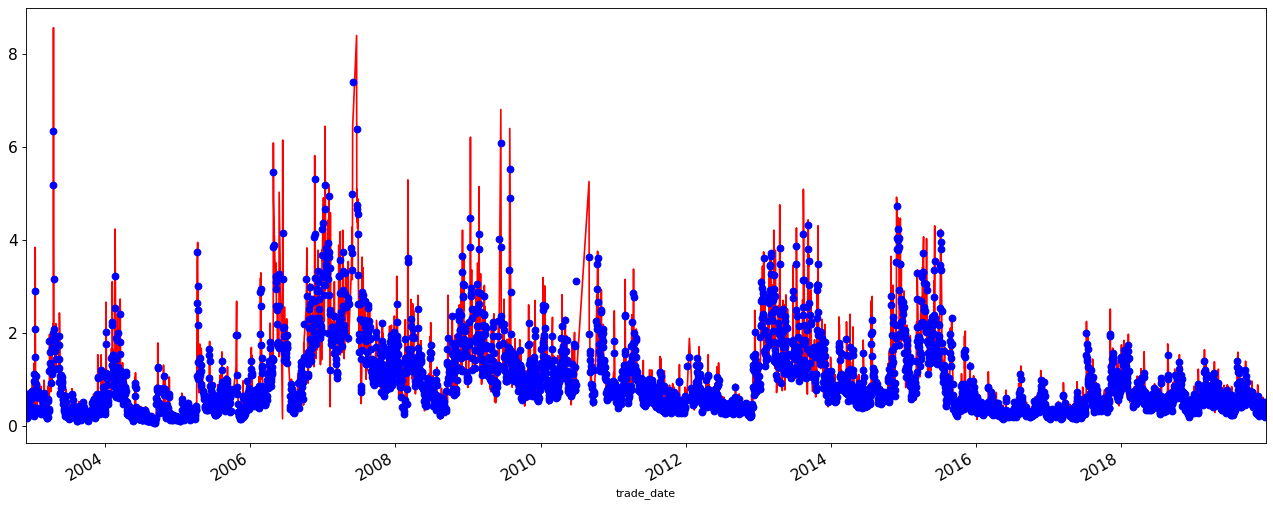

In [55]:

import matplotlib.pyplot as plt
plt.figure(figsize=[20,8],dpi=80)

plt.plot(df1['turnover_rate'],'r-')
#plt.plot(df1['turnover_rate'],linestyle='dashed')  linestyle设置线条的风格，包括颜色和线条样式

plt.xticks(fontsize=14)  #修改x轴刻度的大小
plt.yticks(fontsize=14)  #修改y轴刻度的大小


df1['turnover_rate'].rolling(2,center=True).mean().plot(style='bo')  #移动平均数
plt.show()